In [24]:
import pandas as pd
from sympy import symbols, Eq, solve
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.api as sm

# Problem 1

In [25]:
mean_a_t = 0 
var_a_t = 0.02 
r_99 = 0.02 
r_100 = -0.01
coefficient = 0.2 

mu_r_t = 0.01 / (1 - coefficient)

sigma_squared_r_t = var_a_t / (1 - coefficient ** 2)

forecast_1_step = 0.01 + coefficient * r_99

forecast_2_step = 0.01 + coefficient * r_100

std_dev_forecast_errors = var_a_t ** 0.5

(mu_r_t, sigma_squared_r_t, forecast_1_step, forecast_2_step, std_dev_forecast_errors)

(0.012499999999999999, 0.020833333333333336, 0.014, 0.008, 0.1414213562373095)

# Problem 2

In [26]:
data = pd.read_excel('m-ew6299.xlsx')
data.head()


,date,crsp_ew
0,1962-01-01,-0.792
1,1962-02-01,1.532
2,1962-03-01,-0.596
3,1962-04-01,-7.049
4,1962-05-01,-10.319


## a)

In [27]:
time_series = data['crsp_ew']

lag_selection_results = []
for lag in range(1, 25): 
    model = AutoReg(time_series, lags=lag)
    model_fitted = model.fit()
    lag_selection_results.append((lag, model_fitted.aic))

best_lag = sorted(lag_selection_results, key=lambda x: x[1])[0][0]

ar_model = AutoReg(time_series, lags=best_lag)
ar_model_fitted = ar_model.fit()

ar_model_summary = ar_model_fitted.summary()
ar_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                crsp_ew   No. Observations:                  456
Model:                    AutoReg(24)   Log Likelihood               -1332.977
Method:               Conditional MLE   S.D. of innovations              5.294
Date:                Sat, 24 Feb 2024   AIC                           2717.953
Time:                        23:32:33   BIC                           2823.732
Sample:                            24   HQIC                          2759.714
                                  456                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1854      0.345      3.437      0.001       0.509       1.861
crsp_ew.L1      0.2496      0.048      5.185      0.000       0.155       0.344
crsp_ew.L2     -0.0629      0.050     -1.267      0.205      -0.160       0.034
crsp_ew.L3     -0.0171      0.050     -0.345      0.730      -0.115       0.080
crsp_ew.L4     -0.0011      0.050     -0.021      0.983      -0.098       0.096
crsp_ew.L5     -0.0028      0.050     -0.056      0.955      -0.100       0.094
crsp_ew.L6     -0.0118      0.049     -0.239      0.811      -0.108       0.085
crsp_ew.L7     -0.0173      0.049     -0.352      0.725      -0.114       0.079
crsp_ew.L8     -0.1001      0.049     -2.035      0.042      -0.197      -0.004
crsp_ew.L9      0.0489      0.049      0.989      0.323      -0.048       0.146
crsp_ew.L10     0.0033      0.050      0.067      0.947      -0.094       0.100
crsp_ew.L11    -0.0029      0.049     -0.058      0.954      -0.100       0.094
crsp_ew.L12     0.1097      0.049      2.226      0.026       0.013       0.206
crsp_ew.L13    -0.0533      0.049     -1.085      0.278      -0.150       0.043
crsp_ew.L14    -0.0731      0.049     -1.493      0.135      -0.169       0.023
crsp_ew.L15     0.0322      0.049      0.657      0.511      -0.064       0.128
crsp_ew.L16    -0.0259      0.049     -0.528      0.597      -0.122       0.070
crsp_ew.L17     0.0332      0.050      0.667      0.505      -0.064       0.131
crsp_ew.L18    -0.0256      0.050     -0.514      0.607      -0.123       0.072
crsp_ew.L19    -0.1142      0.050     -2.302      0.021      -0.211      -0.017
crsp_ew.L20     0.0371      0.050      0.745      0.456      -0.061       0.135
crsp_ew.L21    -0.0975      0.050     -1.959      0.050      -0.195     6.6e-05
crsp_ew.L22     0.0362      0.050      0.725      0.469      -0.062       0.134
crsp_ew.L23    -0.0249      0.050     -0.498      0.618      -0.123       0.073
crsp_ew.L24     0.0249      0.049      0.512      0.608      -0.070       0.120
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0848           -0.0000j            1.0848           -0.5000
AR.2            -1.0312           -0.3173j            1.0789           -0.4525
AR.3            -1.0312           +0.3173j            1.0789            0.4525
AR.4            -0.8869           -0.5953j            1.0682           -0.4059
AR.5            -0.8869           +0.5953j            1.0682            0.4059
AR.6            -0.6155           -0.9495j            1.1316           -0.3415
AR.7            -0.6155           +0.9495j            1.1316            0.3415
AR.8            -0.3676           -1.1540j            1.2111           -0.2991
AR.9            -0.3676           +1.1540j           

## b)

In [28]:
from statsmodels.tsa.arima.model import ARIMA

ma_aic_results = []
for q in range(1, 25): 
    try:
        model = ARIMA(time_series, order=(0, 0, q))
        model_fitted = model.fit()
        ma_aic_results.append((q, model_fitted.aic))
    except Exception as e:
        print(f"MA({q}) model could not be fitted: {e}")
        continue

best_q = sorted(ma_aic_results, key=lambda x: x[1])[0][0]

# Fit the MA model with the best q
ma_model = ARIMA(time_series, order=(0, 0, best_q))
ma_model_fitted = ma_model.fit()

# Summary of the fitted MA model
ma_model_summary = ma_model_fitted.summary()
ma_model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                crsp_ew   No. Observations:                  456
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1419.365
Date:                Sat, 24 Feb 2024   AIC                           2844.730
Time:                        23:33:03   BIC                           2857.098
Sample:                             0   HQIC                          2849.602
                                - 456                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0603      0.339      3.129      0.002       0.396       1.724
ma.L1          0.2385      0.050      4.811      0.000       0.141       0.336
sigma2        29.5850      1.109     26.673      0.000      27.411      31.759
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               408.51
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.50
Prob(H) (two-sided):                  0.05   Kurtosis:                         7.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## c)

In [29]:
default_ar_lag = 1  
default_ma_order = 1 

ar_model_forecast = AutoReg(time_series, lags=default_ar_lag).fit()
ar_forecast_values = ar_model_forecast.predict(start=len(time_series), end=len(time_series) + 1)

ma_model_forecast = ARIMA(time_series, order=(0, 0, default_ma_order)).fit()
ma_forecast_values = ma_model_forecast.get_forecast(steps=2).predicted_mean

forecast_results = pd.DataFrame({
    'Step': ['1-step ahead', '2-step ahead'],
    'AR Forecast': ar_forecast_values.values,
    'MA Forecast': ma_forecast_values.values
})

forecast_results


,Step,AR Forecast,MA Forecast
0,1-step ahead,2.609738,2.250027
1,2-step ahead,1.419019,1.060312


d)

As a result of AIC and BIC comparisons, the AR Model shows a lower value, so it can be seen as a good model.

# Problem 3

## a)

Since the stock is worth either $10 or $20 with equal probability, the expected value (EV) of the stock is $15

Bid Price = Ask Price = $15

## b)

In [30]:
# Define variables
p_bid, p_ask = symbols('p_bid p_ask')

# For the market maker to break even when buying (bid price)
# 0.1 chance of buying at true value (10) when trader is informed and 0.9 chance of buying at bid price when trader is uninformed
eq1 = Eq(0.1 * 10 + 0.9 * p_bid, 15)

# For the market maker to break even when selling (ask price)
# 0.1 chance of selling at true value (20) when trader is informed and 0.9 chance of selling at ask price when trader is uninformed
eq2 = Eq(0.1 * 20 + 0.9 * p_ask, 15)

# Solve equations
solutions = solve((eq1, eq2), (p_bid, p_ask))
solutions

{p_bid: 15.5555555555556, p_ask: 14.4444444444444}

## c)

The average trading cost to an uninformed trader is the difference between the prices they buy and sell at (the spread) compared to the true value. The average gain to an informed trader is the difference between the true value and the price at which they transact.

The trading cost (spread) for uninformed traders is:

Ask price - Bid price = \$14.44 - \$ 15.56 = -\$ 1.12

The average gain for an informed trader, assuming they only trade when they have advantageous information, is:

When the stock is worth \$20, they buy at the ask price, gaining \$ 20 -\$ 14.44 = \$ 5.56

When the stock is worth \$10, they sell at the bid price, gaining \$ 15.56 - \$ 10 = \$ 5.56

## d)

For part b, when market makers adjust for the risk of informed trading, they set the bid and ask prices as follows:

Bid price = $ 15.56

Ask price = $ 14.44

Note) the bid price is higher than the expected value without informed trading, and the ask price is lower. This spread compensates the market makers for the risk of trading with informed traders.

The example provided show that while direct damage can be done to those who trade directly with insiders, the presence of insider trading affects all market participants. This leads to a wider bid-request spread as manufacturers in the market adjust prices to mitigate risks associated with potential information asymmetry. These wider spreads increase transaction costs for all traders without information, as well as those who trade directly with insiders.

# Problem 4

## a)

The bid price $P_b$ and the ask price $P_a$ are determinde by the expected value of the security conditional on the type of trader. If the trader is a noise trader with prob. $1-\pi$ , the expected value of the security is simply the average value, $\frac {(v^H + v^L)} 2 $ . If the trader is an insider, the security's value is $v^H$ if they buy and $v^L$ if they sell.

$$P_b = \phi v^L + (1-\phi) \frac {(v^H + v^L)} 2 $$

$$P_a = \phi v^H + (1-\phi) \frac {(v^H + v^L)} 2 $$

Then the spread $S$ is :

$$S = P_a - P_b = \phi (v^H - v^L) $$

## b)

Trading profit when buying : $v^H - P_a = -\phi v^H + v^H - (1-\phi) \frac {(v^H + v^L)} 2 $

Trading profit when buying : $P_b - v^L = -\phi v^L + v^L - (1-\phi) \frac {(v^H + v^L)} 2 $

## c)

The potential insider will never choose to acquire information if the expected profit from trading on information is less than the cost of acquiring that information.

The insider's expected profit when $\phi = 0 $ is:

$$\pi \frac {(v^H - v^L)} 2 $$

Then, the condition is :

$$ \pi \frac {(v^H - v^L)} 2 < c $$

## d)

The potential insider will always choose to acquire information if

$$ c < \pi (v^H - v^L) $$

## e)

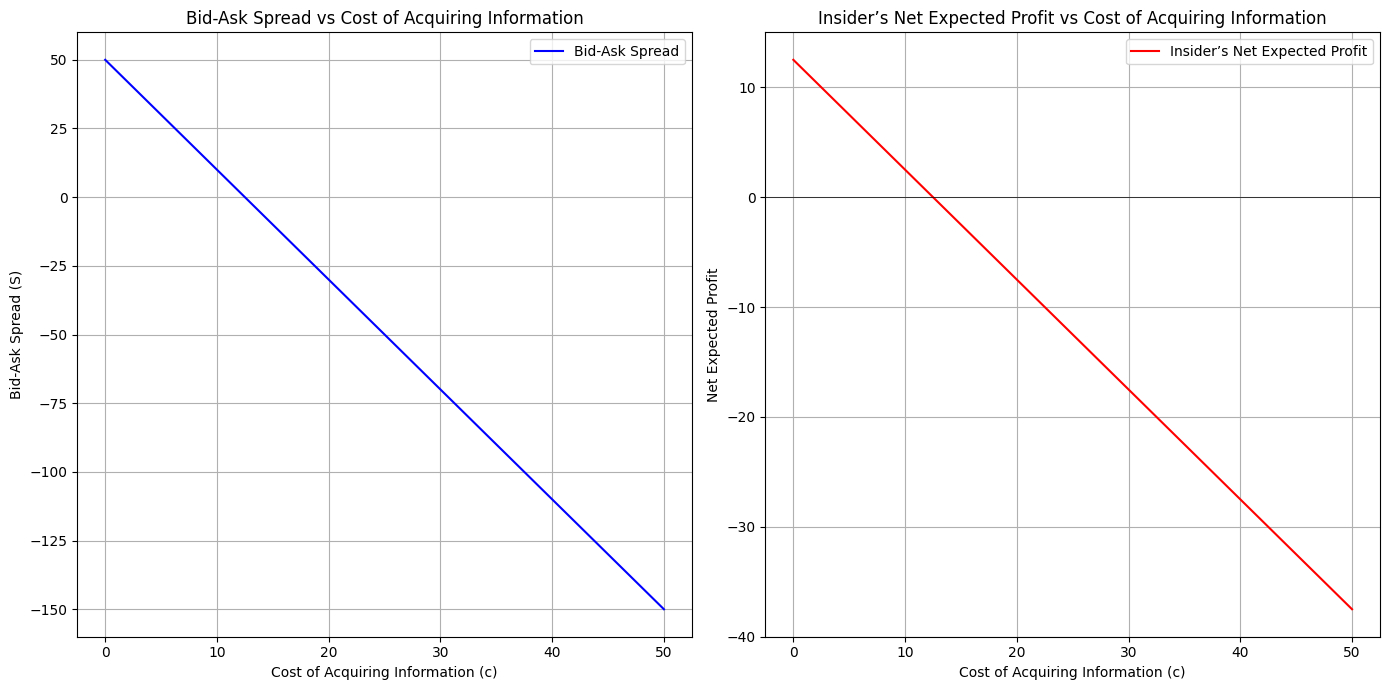

In [31]:
import numpy as np
import matplotlib.pyplot as plt

vH_value = 100
vL_value = 50
pi_value = 0.5
c_values = np.linspace(0, 50, 100)
phi_values = (-2 * c_values + pi_value * (vH_value - vL_value)) / (pi_value * (vH_value - vL_value))

spread_values = phi_values * (vH_value - vL_value)

net_profit_values = pi_value * (vH_value - vL_value) / 2 - c_values


plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(c_values, spread_values, label='Bid-Ask Spread', color='blue')
plt.xlabel('Cost of Acquiring Information (c)')
plt.ylabel('Bid-Ask Spread (S)')
plt.title('Bid-Ask Spread vs Cost of Acquiring Information')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(c_values, net_profit_values, label='Insider’s Net Expected Profit', color='red')
plt.xlabel('Cost of Acquiring Information (c)')
plt.ylabel('Net Expected Profit')
plt.title('Insider’s Net Expected Profit vs Cost of Acquiring Information')
plt.axhline(0, color='black', linewidth=0.5)  # Add a line at zero for reference
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## f)

When c is lower than the condition for always acquiring information, the potential insider will choose to acquire information, resulting in a high bid-ask spread due to the risk of insider trading.

When c exceeds the condition for never acquiring information the potential insider will refrain from acquiring information, resulting in a lower bid-ask spread as the market perceives a lower risk of insider trading.

Between these values, there is a mixed-strategy equilibrium where the insider is indifferent to acquiring information based on the derived value of $\phi$. This reflects a balance between the costs and benefits of acquiring information, with the bid-ask spread and expected profits adjusting accordingly.